In [1]:
%matplotlib notebook
import numpy as np
import emlddmm
import json
import nrrd
import imp
imp.reload(emlddmm)

<module 'emlddmm' from '/mnt/data/csh_data/emlddmm/emlddmm.py'>

In [2]:
# code to do
# common interface for load images
# command line interface
# preprocessing (here we are doing downsampling)
# apply transforms to other data
# profiling (optional profiling?)
# check metrics for gradient descent and update

# release to do
# readme page
# license
# documentation: 
# * explain mandatory inputs
# * explain config file
# * explain dataset format
# * explain output format

In [3]:
atlas_name = '/home/dtward/data/AllenInstitute/ara_nissl/ara_nissl_50.nrrd'
label_name = '/home/dtward/data/AllenInstitute/mouse_ccf/annotation/ccf_2017/annotation_50.nrrd'
target_name = '../microscopy_v2/microscopy/'
config_file = 'config787.json'
output_dir = 'test_outputs/'

In [4]:
with open(config_file) as f:
    config = json.load(f)
# I'm getting this for initial downsampling for preprocessing
downJs = config['downJ']

In [5]:
# load atlas
# TODO common loading function
I,hdr = nrrd.read(atlas_name)
I = I.astype(float)
I = I**0.5
I /= np.sqrt(np.mean(I**2))
I = I[None]
dI = np.diag(hdr['space directions']).astype(float)
nI = I.shape
xI = [np.arange(n)*d - (n-1)*d/2.0*0 for n,d in zip(nI[1:],dI)]
xI = [np.arange(n)*d - (n-1)*d/2.0 for n,d in zip(nI[1:],dI)]

S,hdr = nrrd.read(label_name)

fig = emlddmm.draw(I,xI)

<IPython.core.display.Javascript object>

loading target images


<IPython.core.display.Javascript object>


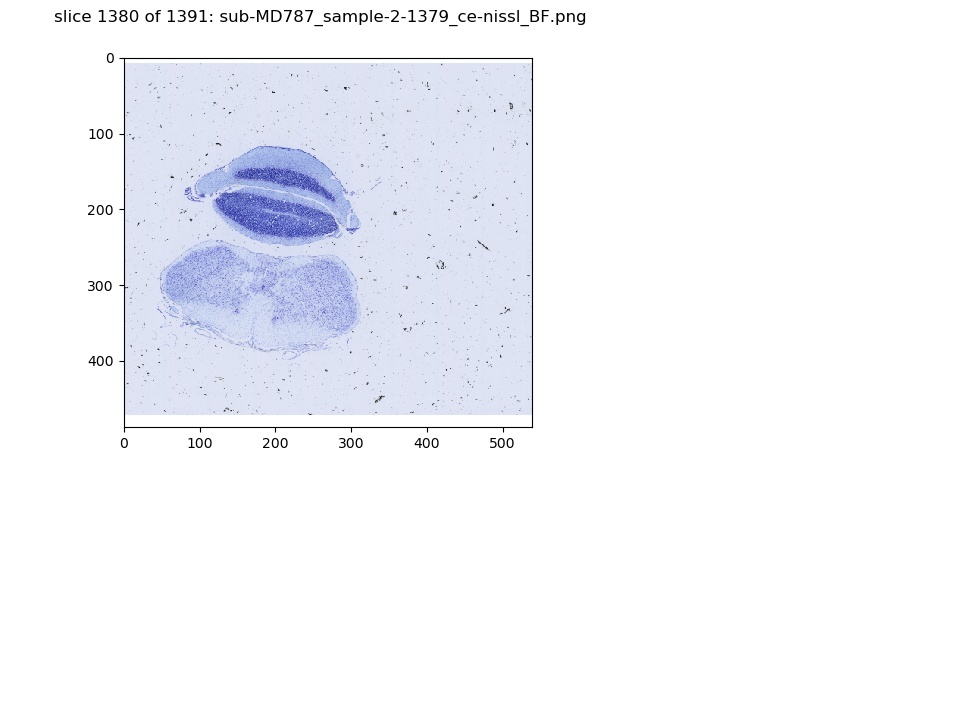

padding and assembling into 3D volume


In [6]:
xJ,J,W0 = emlddmm.load_slices(target_name)
nJ = np.array(J.shape)
dJ = np.array([xJ[0][1]-xJ[0][0], xJ[1][1]-xJ[1][0],xJ[2][1]-xJ[2][0]])

In [7]:
# initial downsampling
mindownJ = np.min(np.array(downJs),0)
xJ,J = emlddmm.downsample_image_domain(xJ,J,mindownJ)
W0 = emlddmm.downsample(W0,mindownJ)
downJs = [ (np.array(d)/mindownJ).astype(int) for d in downJs]
dJ = np.array((xJ[0][1]-xJ[0][0],xJ[1][1]-xJ[1][0],xJ[2][1]-xJ[2][0]))
nJ = np.array(J.shape,dtype=int)
config['downJ'] = downJs

dv tensor([150., 150., 150.], device='cuda:1')
a scale is 300.0


<IPython.core.display.Javascript object>


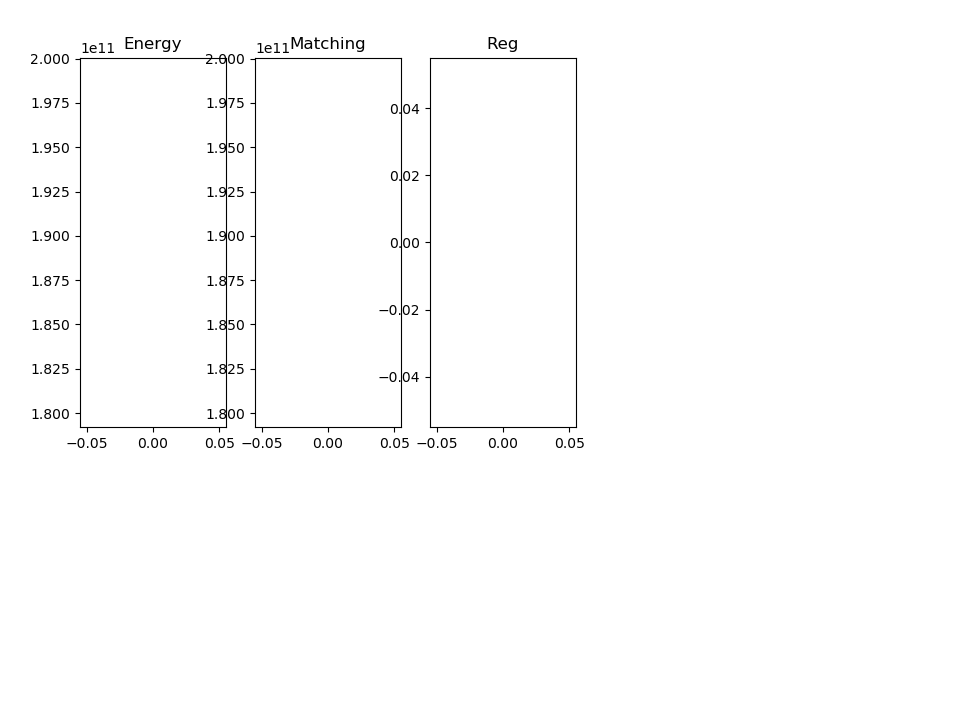

<IPython.core.display.Javascript object>


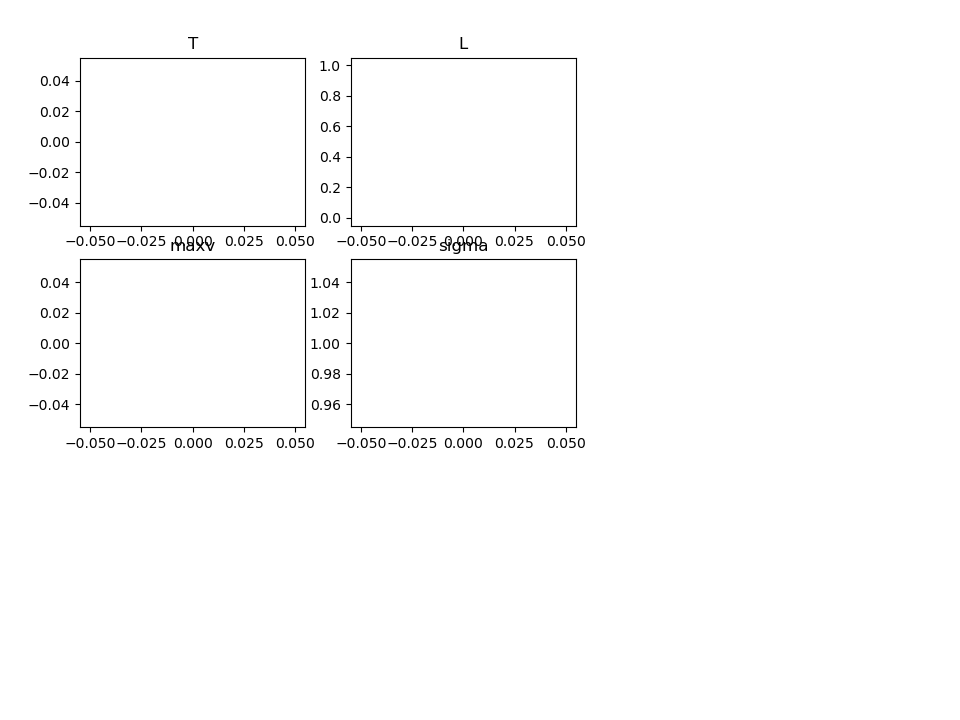

<IPython.core.display.Javascript object>


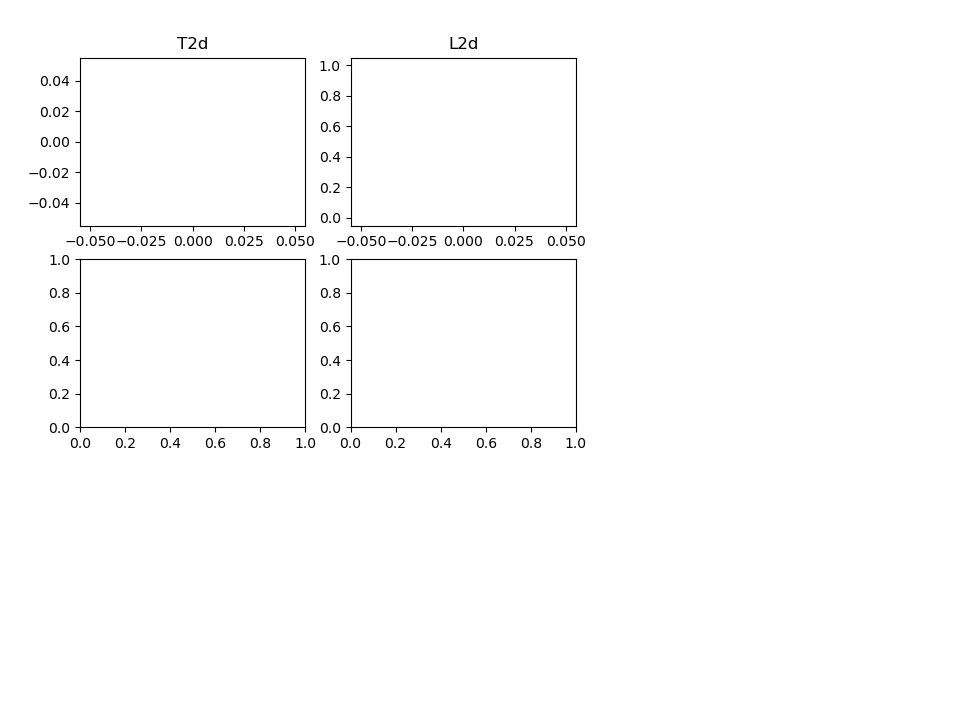

<IPython.core.display.Javascript object>


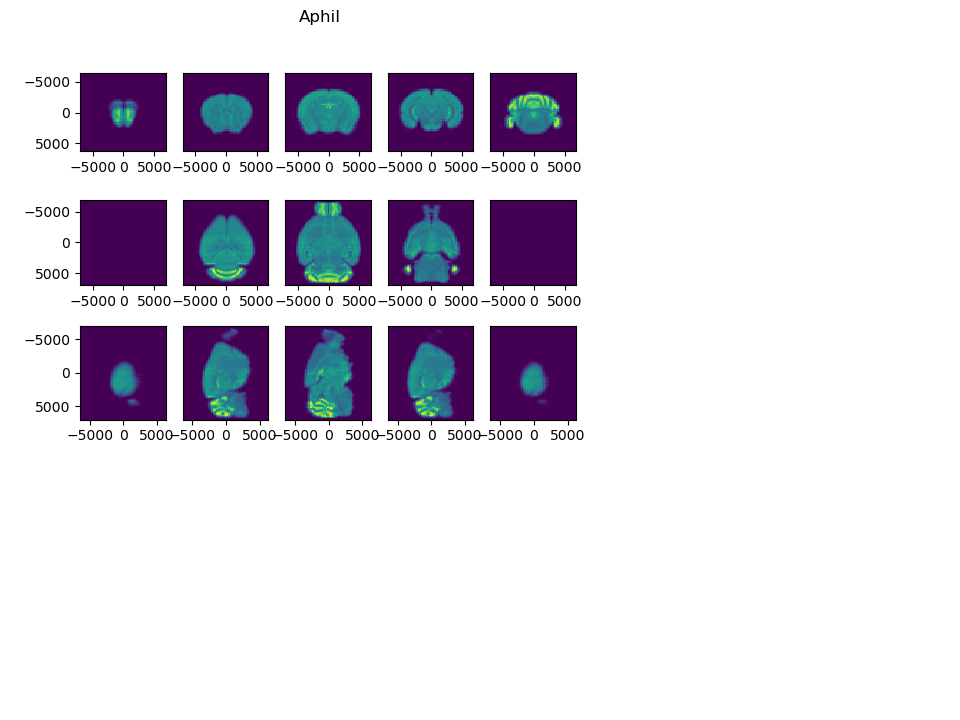

<IPython.core.display.Javascript object>


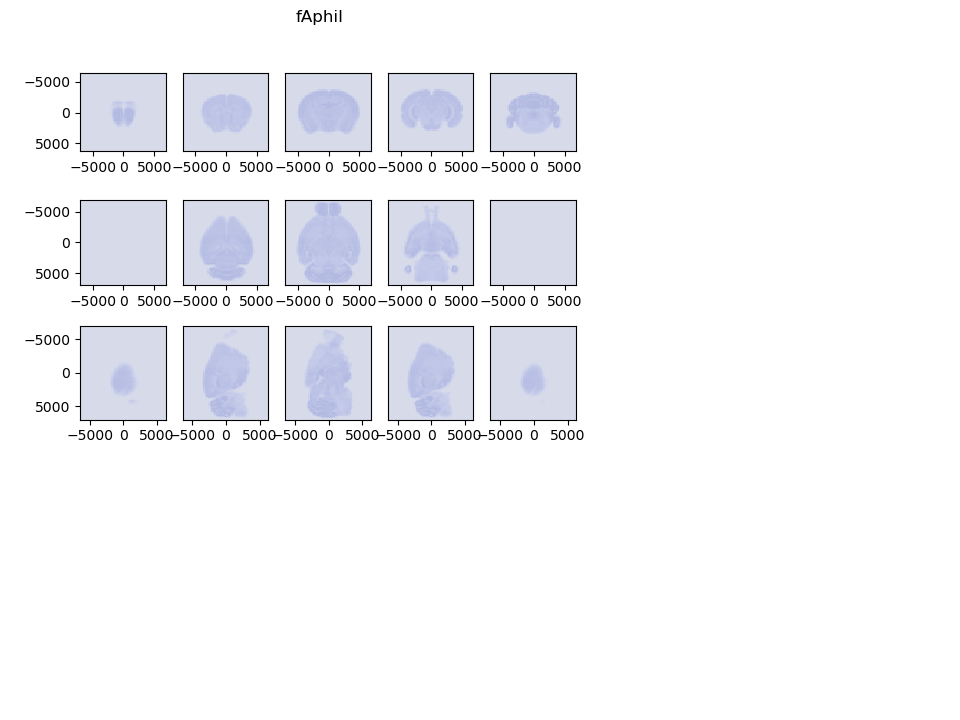

<IPython.core.display.Javascript object>


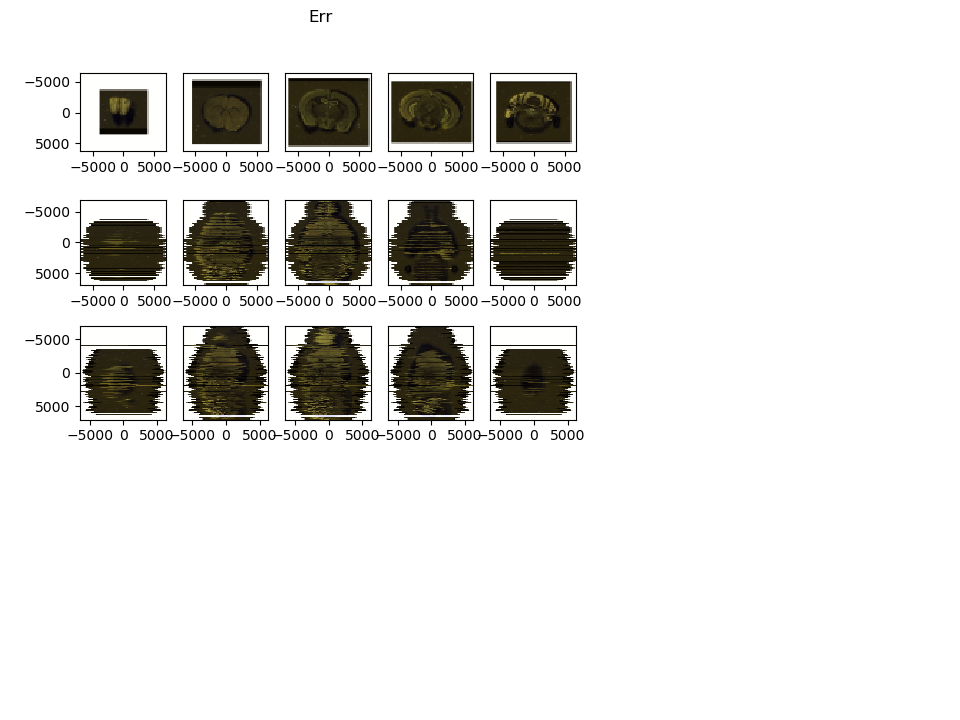

<IPython.core.display.Javascript object>


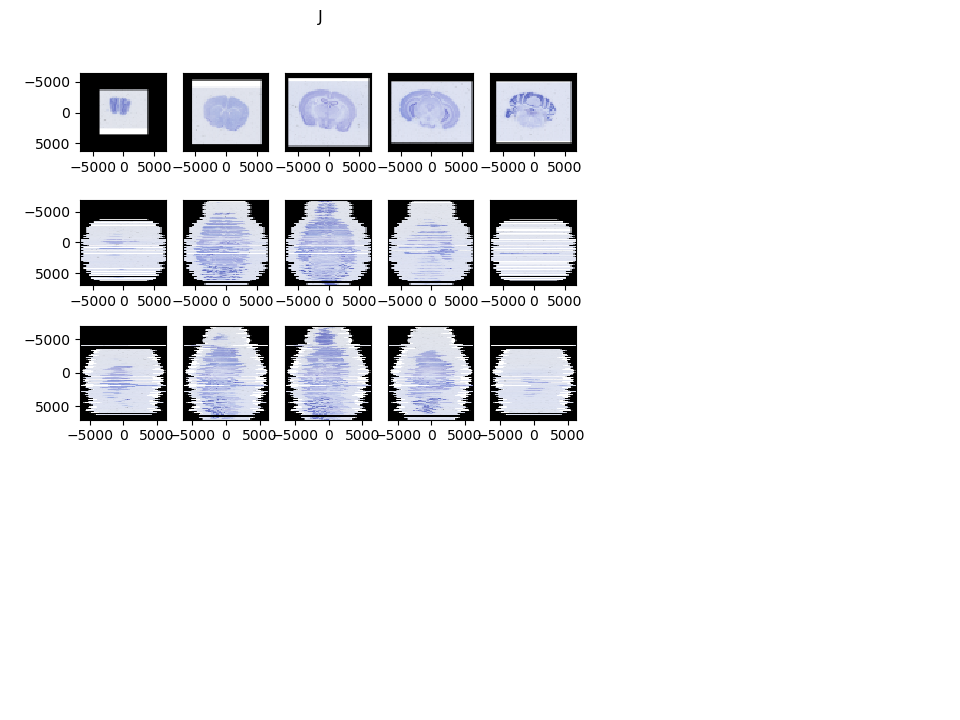

<IPython.core.display.Javascript object>


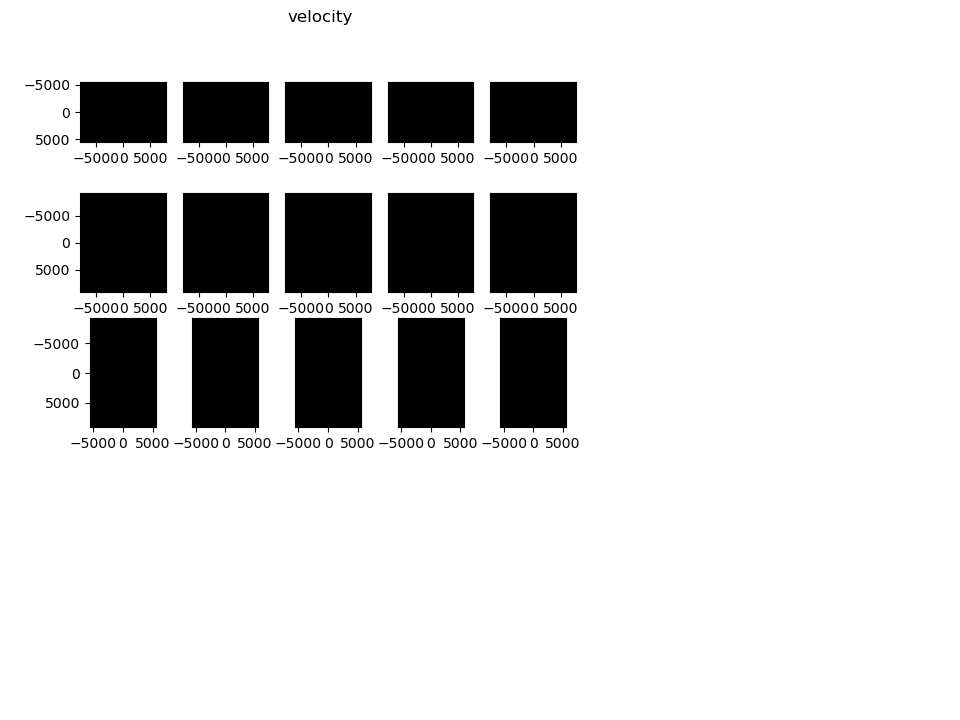

<IPython.core.display.Javascript object>


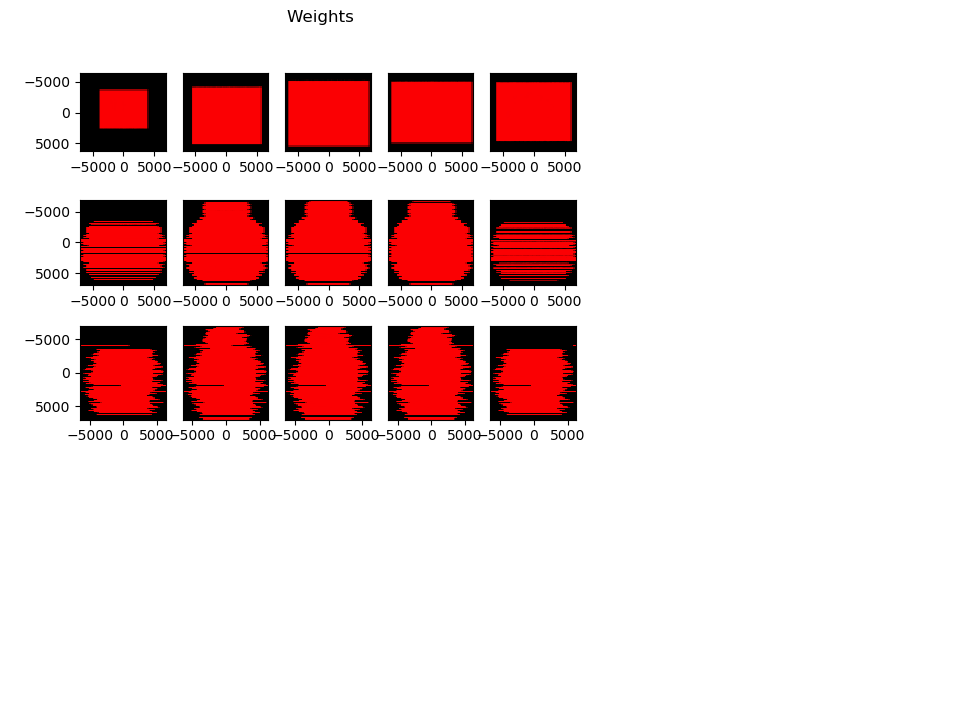

/mnt/data/csh_data/emlddmm/emlddmm.py:41: RuntimeWarning: invalid value encountered in true_divide
  J /= (vmax[:,None,None,None] - vmin[:,None,None,None])


Finished iteration 0
Finished iteration 10
Iteration 20, linear oscilating, reducing eA to 0.9
Finished iteration 20
Finished iteration 30
Finished iteration 40


In [ ]:
output = emlddmm.emlddmm_multiscale(I=I,xI=[xI],J=J,xJ=[xJ],W0=W0,device='cuda:1',**config)

In [ ]:
write_transform_outputs(output_dir,output)

In [ ]:
write_qc_outputs(output_dir,output,xI,I,xJ,J,xS=xI,S=S)